In [1]:
import numpy as np
import pandas as pd

# Set the random seed for reproductivity
np.random.seed(123)

# Create a dataframe with two classes
n_samples=1000
class_0_ratio=0.9
n_class_0=int(n_samples * class_0_ratio)
n_class_1=n_samples - n_class_0

In [3]:
n_class_0,n_class_1

(900, 100)

In [5]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET
class_0=pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0
})

class_1=pd.DataFrame({
    'feature_1':np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2':np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1]*n_class_1
})


In [6]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [7]:
df.head()

,feature_1,feature_2,target
0,-1.774224,0.285744,0
1,-1.201377,0.333279,0
2,1.096257,0.531807,0
3,0.861037,-0.354766,0
4,-1.520367,-1.120815,0


In [8]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [9]:
## Upsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [10]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True,
                               n_samples=len(df_majority),random_state=42)

In [11]:

df_minority_upsampled.shape


(900, 3)

In [13]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,2.905343,1.495151,1
992,2.000977,1.814833,1
914,1.927957,2.280911,1
971,2.819483,2.964646,1
960,2.456515,1.833528,1


In [16]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])

In [17]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

### Downsampling

In [ ]:
import numpy as np
import pandas as pd

# Set the random seed for reproductivity
np.random.seed(123)

# Create a dataframe with two classes
n_samples=1000
class_0_ratio=0.9
n_class_0=int(n_samples * class_0_ratio)
n_class_1=n_samples - n_class_0

In [18]:
n_class_0,n_class_1

(900, 100)

In [19]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET
class_0=pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0
})

class_1=pd.DataFrame({
    'feature_1':np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2':np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1]*n_class_1
})


In [20]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [ ]:
## Downsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [23]:
from sklearn.utils import resample
df_majority_downsampled=resample(df_majority,replace=True,    ## sample with replacement
                               n_samples=len(df_minority),random_state=42)

In [24]:
df_majority_downsampled.shape

(100, 3)

In [25]:
df_downsampled=pd.concat([df_minority,df_majority_downsampled])

In [26]:
df_downsampled['target'].value_counts()

target
1    100
0    100
Name: count, dtype: int64

## SMOTE(Synthetic Minority Oversampling Technique)
-generating synthetic instances of the minority class by interpolating between existing instances


In [4]:
from sklearn.datasets import make_classification

In [5]:
x,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=12)

In [6]:
import pandas as pd
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [7]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

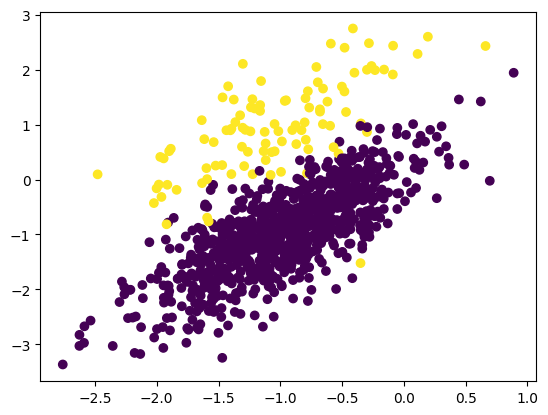

In [8]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [37]:
%pip install imblearn


  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [1]:
import imblearn
from imblearn.over_sampling import SMOTE


In [9]:
 ## transform the dataset
oversample=SMOTE()
x,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [10]:
x.shape

(1800, 2)

In [11]:
y.shape

(1800,)

In [14]:
len(y[y==0])

900

In [15]:
len(y[y==1])

900

In [18]:
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

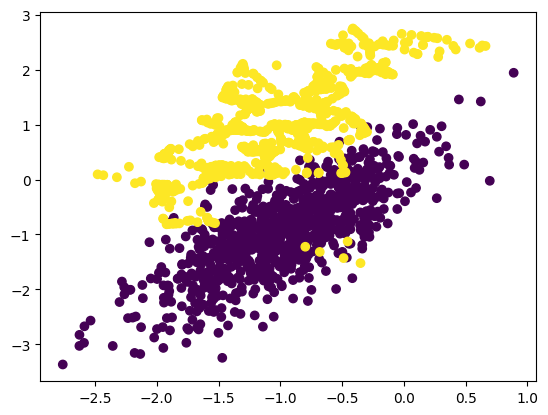

In [19]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])